In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask

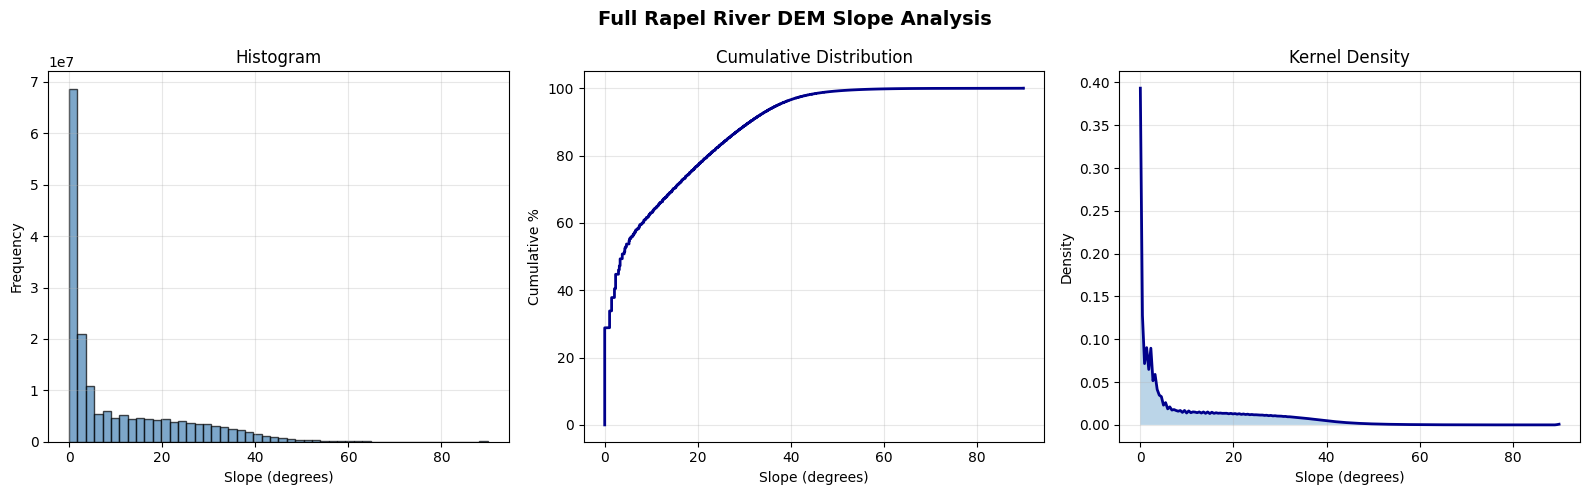


Full DEM Statistics:
Mean: 10.57° | Median: 3.77° | Max: 89.96°


In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Open the full DEM
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    elevation = dem.read(1)
    transform = dem.transform

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
slope_clean = slope_degrees[~np.isnan(slope_degrees)].flatten()

# Create three plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
ax1.hist(slope_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Slope (degrees)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')
ax1.grid(True, alpha=0.3)

# Cumulative distribution
sorted_slopes = np.sort(slope_clean)
cumulative = np.arange(1, len(sorted_slopes) + 1) / len(sorted_slopes) * 100
ax2.plot(sorted_slopes, cumulative, linewidth=2, color='darkblue')
ax2.set_xlabel('Slope (degrees)')
ax2.set_ylabel('Cumulative %')
ax2.set_title('Cumulative Distribution')
ax2.grid(True, alpha=0.3)

# Kernel density
density = stats.gaussian_kde(slope_clean)
x_range = np.linspace(slope_clean.min(), slope_clean.max(), 200)
ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
ax3.fill_between(x_range, density(x_range), alpha=0.3)
ax3.set_xlabel('Slope (degrees)')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density')
ax3.grid(True, alpha=0.3)

fig.suptitle('Full Rapel River DEM Slope Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nFull DEM Statistics:")
print(f"Mean: {np.mean(slope_clean):.2f}° | Median: {np.median(slope_clean):.2f}° | Max: {np.max(slope_clean):.2f}°")

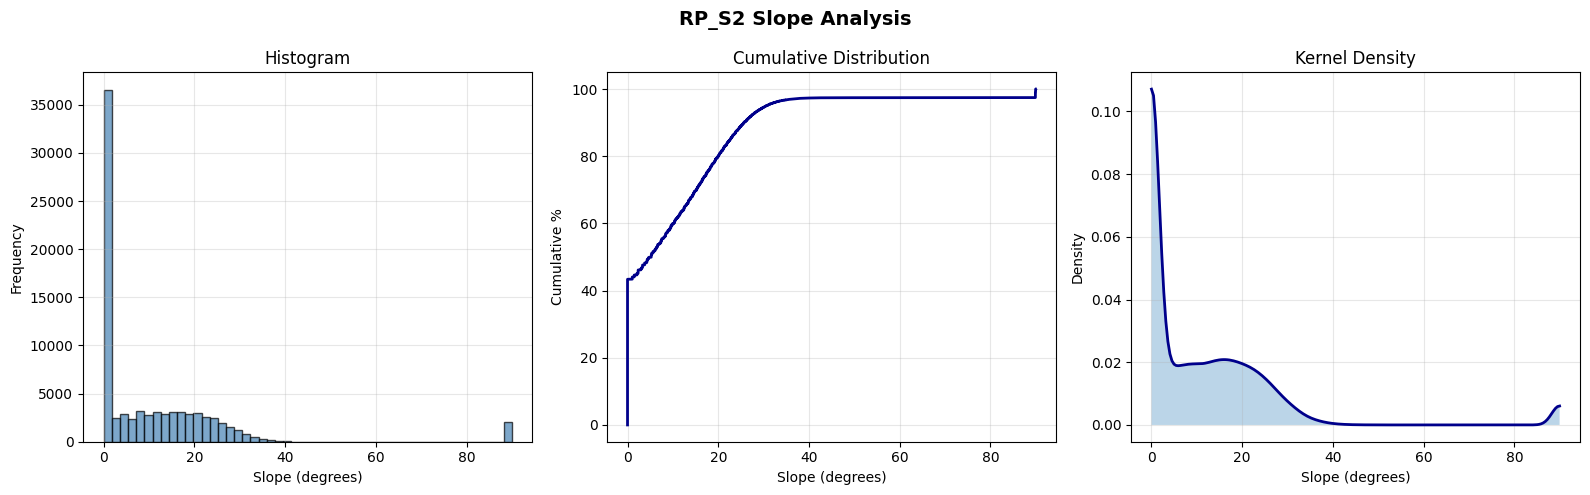


RP_S2 Statistics:
Mean: 10.75° | Median: 5.22° | Max: 89.96°


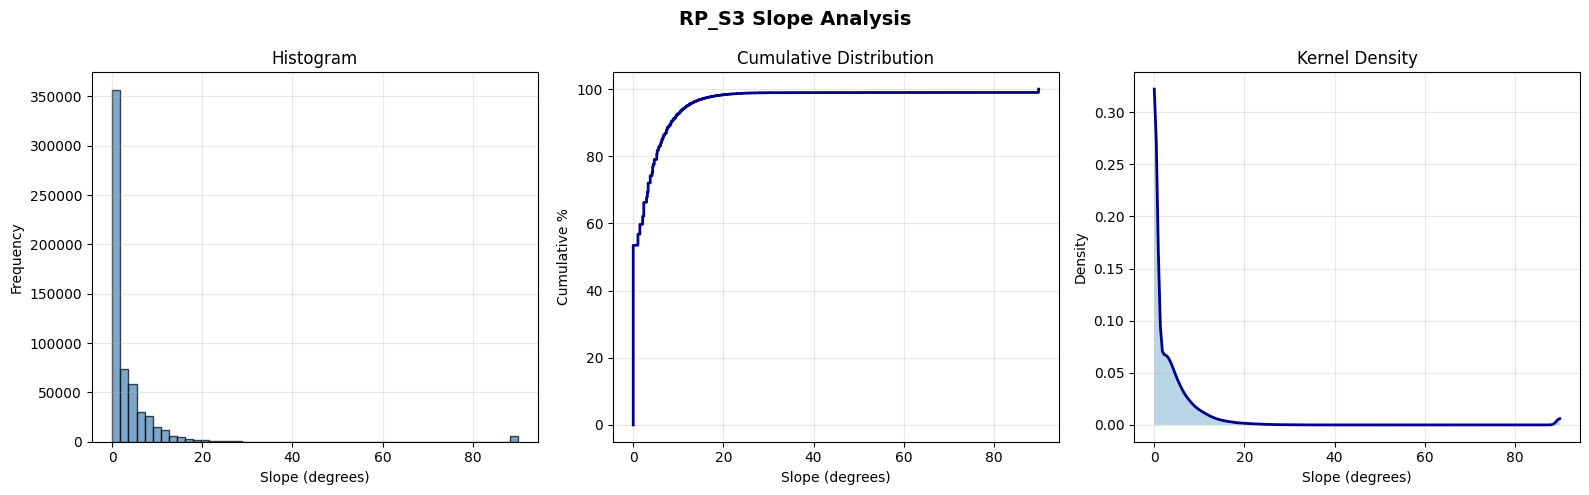


RP_S3 Statistics:
Mean: 3.48° | Median: 0.00° | Max: 89.96°


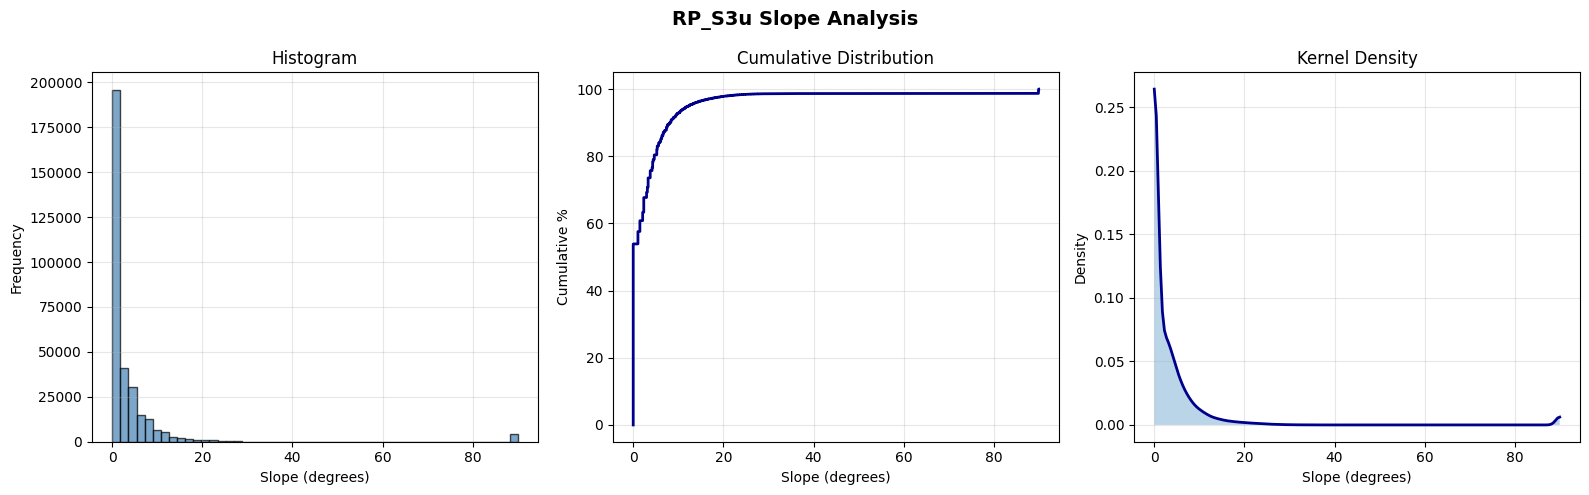


RP_S3u Statistics:
Mean: 3.64° | Median: 0.00° | Max: 89.96°


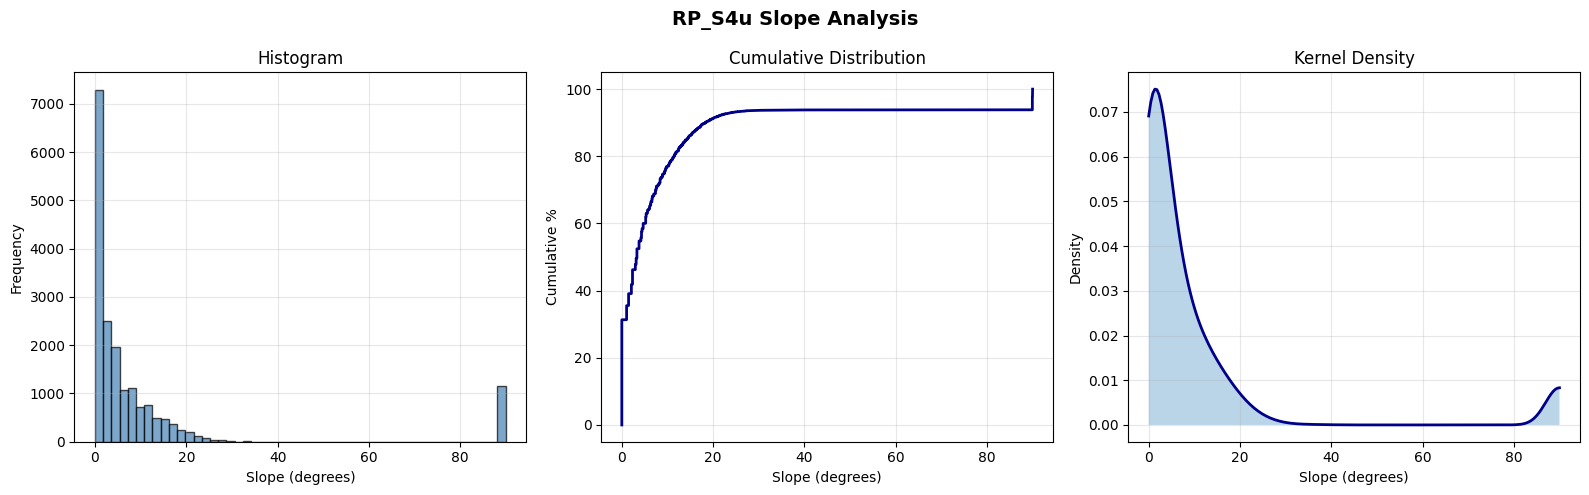


RP_S4u Statistics:
Mean: 10.16° | Median: 3.31° | Max: 89.96°


In [22]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask
from scipy import stats

def analyze_slope(shapefile_path, dem_path, title):
    # Read shapefile and clip DEM
    shapefile = gpd.read_file(shapefile_path)
    with rasterio.open(dem_path) as dem:
        elevation, transform = mask(dem, shapefile.geometry, crop=True)
        elevation = elevation[0]
    
    # Calculate slope
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
    slope_clean = slope_degrees[~np.isnan(slope_degrees)].flatten()
    
    # Create three plots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    
    # Histogram
    ax1.hist(slope_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.set_xlabel('Slope (degrees)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram')
    ax1.grid(True, alpha=0.3)
    
    # Cumulative distribution
    sorted_slopes = np.sort(slope_clean)
    cumulative = np.arange(1, len(sorted_slopes) + 1) / len(sorted_slopes) * 100
    ax2.plot(sorted_slopes, cumulative, linewidth=2, color='darkblue')
    ax2.set_xlabel('Slope (degrees)')
    ax2.set_ylabel('Cumulative %')
    ax2.set_title('Cumulative Distribution')
    ax2.grid(True, alpha=0.3)
    
    # Kernel density
    density = stats.gaussian_kde(slope_clean)
    x_range = np.linspace(slope_clean.min(), slope_clean.max(), 200)
    ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
    ax3.fill_between(x_range, density(x_range), alpha=0.3)
    ax3.set_xlabel('Slope (degrees)')
    ax3.set_ylabel('Density')
    ax3.set_title('Kernel Density')
    ax3.grid(True, alpha=0.3)
    
    fig.suptitle(f'{title} Slope Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{title} Statistics:")
    print(f"Mean: {np.mean(slope_clean):.2f}° | Median: {np.median(slope_clean):.2f}° | Max: {np.max(slope_clean):.2f}°")

# DEM path (used for all)
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'

# Run for each shapefile
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', dem_path, 'RP_S2')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', dem_path, 'RP_S3')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', dem_path, 'RP_S3u')
analyze_slope('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', dem_path, 'RP_S4u')

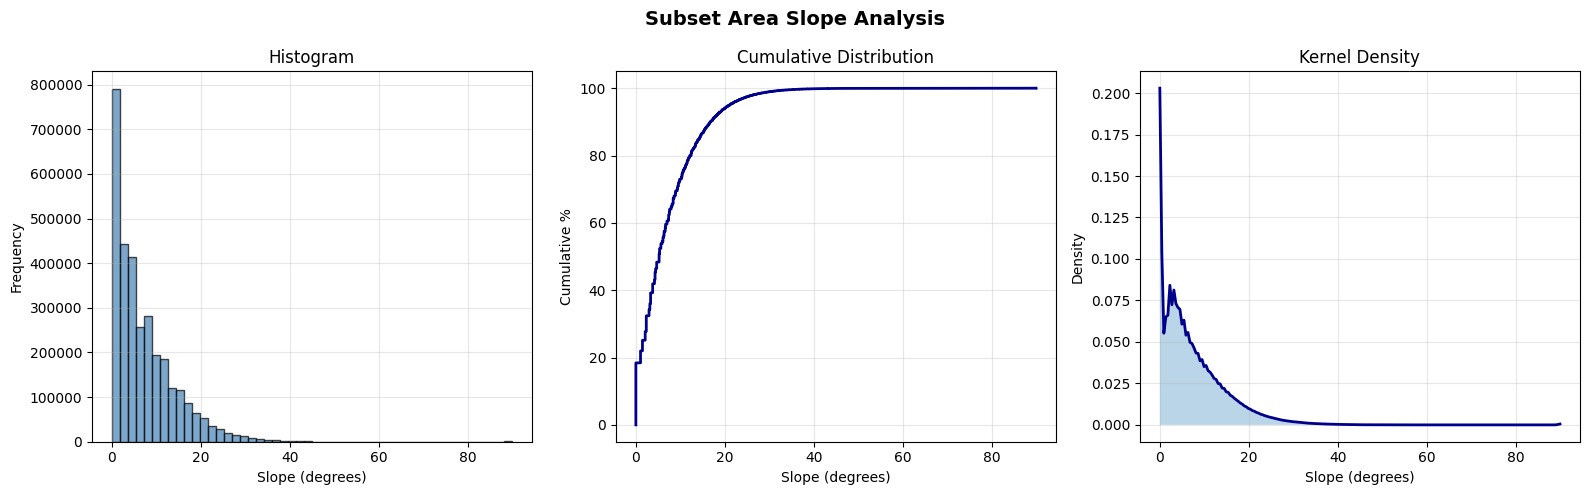


Subset Area Statistics:
Mean: 7.13° | Median: 5.22° | Max: 89.93°
Area dimensions: ~52.9 km × ~44.5 km


In [25]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from rasterio.windows import from_bounds

# Your area coordinates (UTM)
min_x, min_y = 222103, 6208992  # Lower left
max_x, max_y = 275034, 6253454  # Upper right

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
slope_clean = slope_degrees[~np.isnan(slope_degrees)].flatten()

# Create three plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
ax1.hist(slope_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Slope (degrees)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')
ax1.grid(True, alpha=0.3)

# Cumulative distribution
sorted_slopes = np.sort(slope_clean)
cumulative = np.arange(1, len(sorted_slopes) + 1) / len(sorted_slopes) * 100
ax2.plot(sorted_slopes, cumulative, linewidth=2, color='darkblue')
ax2.set_xlabel('Slope (degrees)')
ax2.set_ylabel('Cumulative %')
ax2.set_title('Cumulative Distribution')
ax2.grid(True, alpha=0.3)

# Kernel density
density = stats.gaussian_kde(slope_clean)
x_range = np.linspace(slope_clean.min(), slope_clean.max(), 200)
ax3.plot(x_range, density(x_range), linewidth=2, color='darkblue')
ax3.fill_between(x_range, density(x_range), alpha=0.3)
ax3.set_xlabel('Slope (degrees)')
ax3.set_ylabel('Density')
ax3.set_title('Kernel Density')
ax3.grid(True, alpha=0.3)

fig.suptitle('Subset Area Slope Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nSubset Area Statistics:")
print(f"Mean: {np.mean(slope_clean):.2f}° | Median: {np.median(slope_clean):.2f}° | Max: {np.max(slope_clean):.2f}°")
print(f"Area dimensions: ~{(max_x-min_x)/1000:.1f} km × ~{(max_y-min_y)/1000:.1f} km")

Valid elevation range: 1m to 655m
Number of valid pixels: 2634515


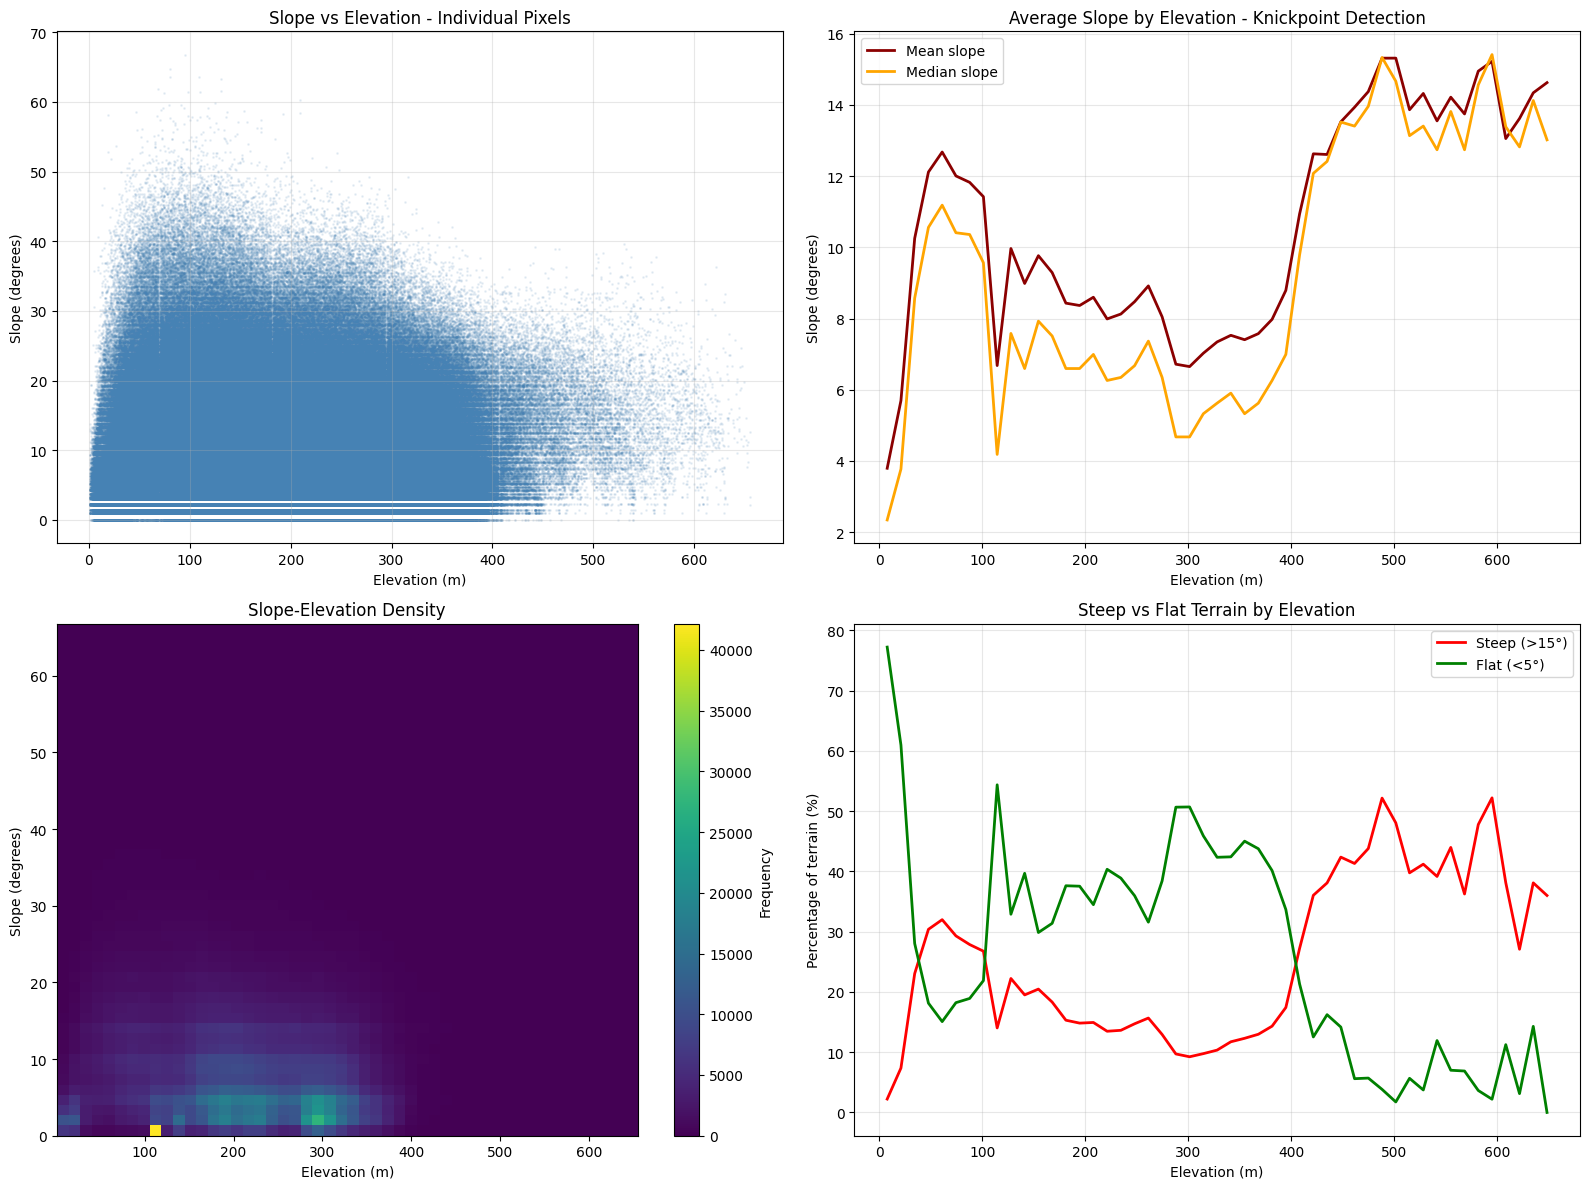


=== KNICKPOINT ANALYSIS ===
Elevation range: 1m to 655m

Look for sudden changes in the 'Mean slope by elevation' plot:
- Sharp increases = transition from flat to steep (knickpoint)
- Sharp decreases = transition from steep to flat

Potential knickpoint elevation: ~21m
(Largest change in slope gradient)


In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from rasterio.windows import from_bounds

# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter out invalid values: NaN, nodata, and unrealistic elevations
valid_mask = (~np.isnan(slope_degrees) & 
              ~np.isnan(elevation) & 
              (elevation > 0) &  # Remove negative elevations
              (elevation < 10000))  # Remove unrealistic high values

if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

print(f"Valid elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
print(f"Number of valid pixels: {len(elevation_valid)}")

# Create elevation bins to analyze slope distribution by elevation
elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 50)
bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
mean_slopes = []
median_slopes = []

# Calculate mean and median slope for each elevation bin
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 0:
        mean_slopes.append(np.mean(slope_valid[mask]))
        median_slopes.append(np.median(slope_valid[mask]))
    else:
        mean_slopes.append(np.nan)
        median_slopes.append(np.nan)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Slope vs Elevation scatter plot
ax1.scatter(elevation_valid, slope_valid, alpha=0.1, s=1, c='steelblue')
ax1.set_xlabel('Elevation (m)')
ax1.set_ylabel('Slope (degrees)')
ax1.set_title('Slope vs Elevation - Individual Pixels')
ax1.grid(True, alpha=0.3)

# 2. Mean slope by elevation (knickpoint detector)
ax2.plot(bin_centers, mean_slopes, linewidth=2, color='darkred', label='Mean slope')
ax2.plot(bin_centers, median_slopes, linewidth=2, color='orange', label='Median slope')
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Slope (degrees)')
ax2.set_title('Average Slope by Elevation - Knickpoint Detection')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Histogram of slopes (colored by elevation)
ax3.hist2d(elevation_valid, slope_valid, bins=50, cmap='viridis')
ax3.set_xlabel('Elevation (m)')
ax3.set_ylabel('Slope (degrees)')
ax3.set_title('Slope-Elevation Density')
plt.colorbar(ax3.collections[0], ax=ax3, label='Frequency')

# 4. Identify steep vs flat terrain by elevation threshold
steep_threshold = 15  # degrees
flat_threshold = 5    # degrees

steep_terrain = slope_valid > steep_threshold
flat_terrain = slope_valid < flat_threshold

# Calculate what % of terrain is steep/flat at each elevation
pct_steep = []
pct_flat = []
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 0:
        pct_steep.append(np.sum(steep_terrain[mask]) / np.sum(mask) * 100)
        pct_flat.append(np.sum(flat_terrain[mask]) / np.sum(mask) * 100)
    else:
        pct_steep.append(0)
        pct_flat.append(0)

ax4.plot(bin_centers, pct_steep, linewidth=2, color='red', label=f'Steep (>{steep_threshold}°)')
ax4.plot(bin_centers, pct_flat, linewidth=2, color='green', label=f'Flat (<{flat_threshold}°)')
ax4.set_xlabel('Elevation (m)')
ax4.set_ylabel('Percentage of terrain (%)')
ax4.set_title('Steep vs Flat Terrain by Elevation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print knickpoint analysis
print("\n=== KNICKPOINT ANALYSIS ===")
print(f"Elevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
print(f"\nLook for sudden changes in the 'Mean slope by elevation' plot:")
print("- Sharp increases = transition from flat to steep (knickpoint)")
print("- Sharp decreases = transition from steep to flat")

# Find elevation where slope changes most dramatically
slope_gradient = np.gradient(mean_slopes)
max_change_idx = np.nanargmax(np.abs(slope_gradient))
knickpoint_elevation = bin_centers[max_change_idx]
print(f"\nPotential knickpoint elevation: ~{knickpoint_elevation:.0f}m")
print(f"(Largest change in slope gradient)")

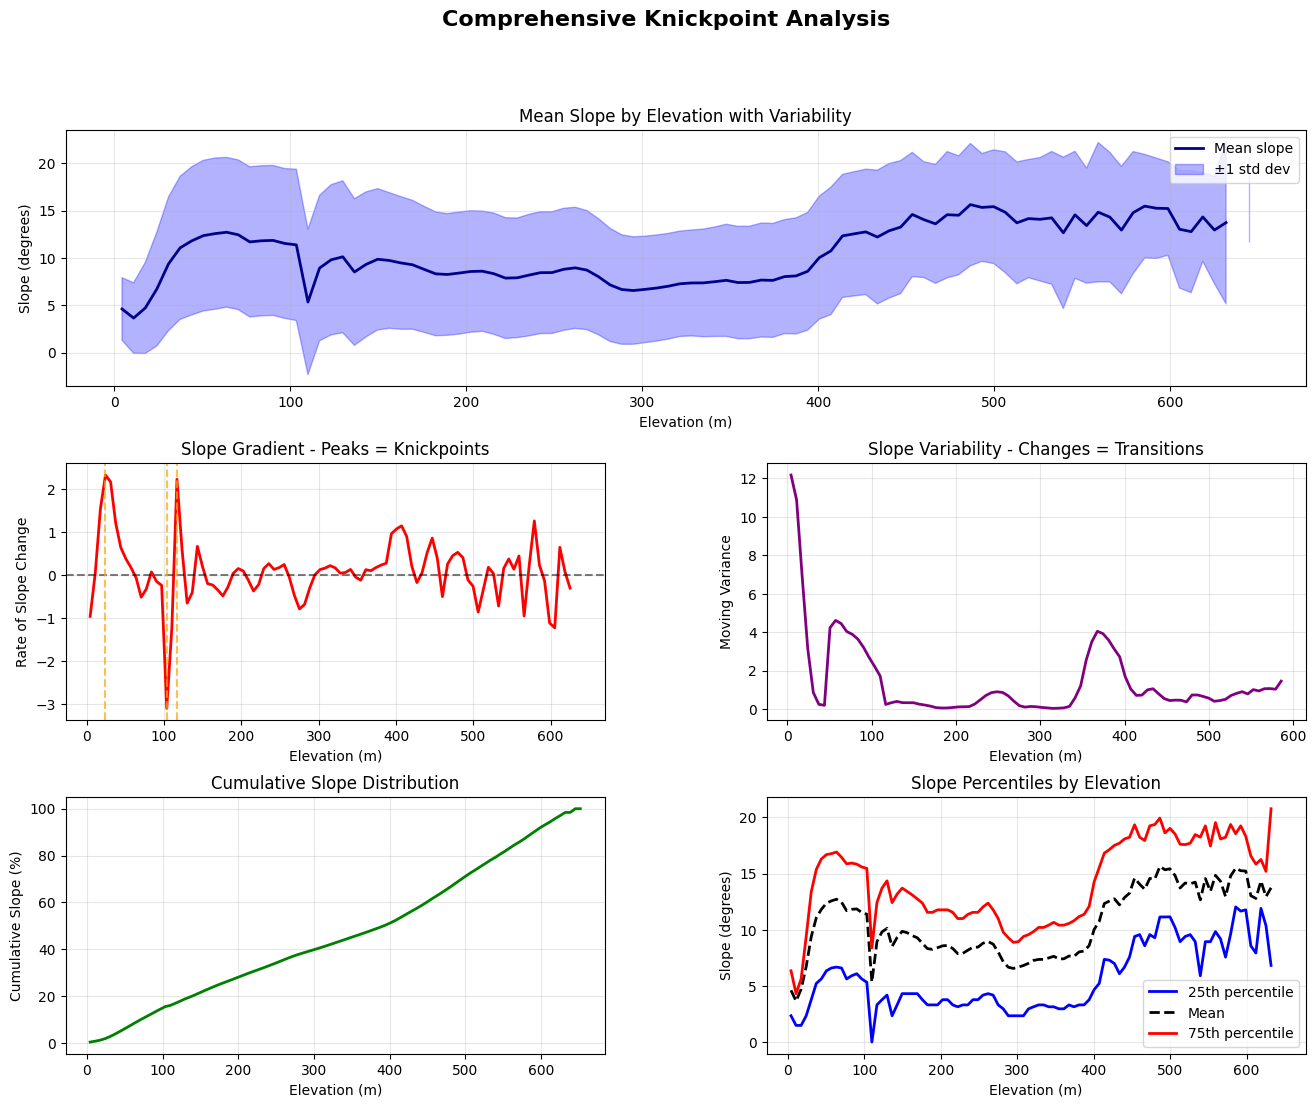


=== KNICKPOINT CANDIDATES ===
Based on rate of change analysis (largest jumps):

1. Elevation: 103m | Change: -3.096°/m | Direction: steep→flat
2. Elevation: 24m | Change: 2.332°/m | Direction: flat→steep
3. Elevation: 117m | Change: 2.233°/m | Direction: flat→steep
4. Elevation: 31m | Change: 2.174°/m | Direction: flat→steep
5. Elevation: 18m | Change: 1.537°/m | Direction: flat→steep

Elevation range analyzed: 1m to 655m


In [28]:
# Slope area analysis
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from rasterio.windows import from_bounds

# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter valid values
valid_mask = (~np.isnan(slope_degrees) & 
              ~np.isnan(elevation) & 
              (elevation > 0) & 
              (elevation < 10000))
if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

# Method 1: Statistical change detection
elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
mean_slopes = []
std_slopes = []

for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 10:  # Need enough data points
        mean_slopes.append(np.mean(slope_valid[mask]))
        std_slopes.append(np.std(slope_valid[mask]))
    else:
        mean_slopes.append(np.nan)
        std_slopes.append(np.nan)

mean_slopes = np.array(mean_slopes)
std_slopes = np.array(std_slopes)

# Calculate rate of change (derivative)
slope_change = np.gradient(mean_slopes)

# Method 2: Moving window variance (detects where variability changes)
window_size = 10
moving_variance = []
for i in range(len(mean_slopes) - window_size):
    moving_variance.append(np.nanvar(mean_slopes[i:i+window_size]))

# Create comprehensive analysis
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Mean slope by elevation with confidence bands
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(bin_centers, mean_slopes, linewidth=2, color='darkblue', label='Mean slope')
ax1.fill_between(bin_centers, 
                  mean_slopes - std_slopes, 
                  mean_slopes + std_slopes, 
                  alpha=0.3, color='blue', label='±1 std dev')
ax1.set_xlabel('Elevation (m)')
ax1.set_ylabel('Slope (degrees)')
ax1.set_title('Mean Slope by Elevation with Variability')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rate of change (derivative) - spikes indicate knickpoints
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(bin_centers, slope_change, linewidth=2, color='red')
ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Rate of Slope Change')
ax2.set_title('Slope Gradient - Peaks = Knickpoints')
ax2.grid(True, alpha=0.3)

# Identify top 3 knickpoint candidates
valid_indices = ~np.isnan(slope_change)
if np.sum(valid_indices) > 0:
    abs_changes = np.abs(slope_change[valid_indices])
    top_3_indices = np.argsort(abs_changes)[-3:]
    valid_bin_centers = bin_centers[valid_indices]
    for idx in top_3_indices:
        ax2.axvline(valid_bin_centers[idx], color='orange', linestyle='--', alpha=0.7)

# Plot 3: Moving variance - changes indicate regime shifts
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(bin_centers[:len(moving_variance)], moving_variance, linewidth=2, color='purple')
ax3.set_xlabel('Elevation (m)')
ax3.set_ylabel('Moving Variance')
ax3.set_title('Slope Variability - Changes = Transitions')
ax3.grid(True, alpha=0.3)

# Plot 4: Cumulative slope distribution by elevation
ax4 = fig.add_subplot(gs[2, 0])
cumsum_slopes = np.nancumsum(mean_slopes)
cumsum_slopes = cumsum_slopes / cumsum_slopes[-1] * 100  # Normalize to percentage
ax4.plot(bin_centers, cumsum_slopes, linewidth=2, color='green')
ax4.set_xlabel('Elevation (m)')
ax4.set_ylabel('Cumulative Slope (%)')
ax4.set_title('Cumulative Slope Distribution')
ax4.grid(True, alpha=0.3)

# Plot 5: Percentile analysis
ax5 = fig.add_subplot(gs[2, 1])
p25_slopes = []
p75_slopes = []
for i in range(len(elevation_bins) - 1):
    mask = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
    if np.sum(mask) > 10:
        p25_slopes.append(np.percentile(slope_valid[mask], 25))
        p75_slopes.append(np.percentile(slope_valid[mask], 75))
    else:
        p25_slopes.append(np.nan)
        p75_slopes.append(np.nan)

ax5.plot(bin_centers, p25_slopes, linewidth=2, color='blue', label='25th percentile')
ax5.plot(bin_centers, mean_slopes, linewidth=2, color='black', label='Mean', linestyle='--')
ax5.plot(bin_centers, p75_slopes, linewidth=2, color='red', label='75th percentile')
ax5.set_xlabel('Elevation (m)')
ax5.set_ylabel('Slope (degrees)')
ax5.set_title('Slope Percentiles by Elevation')
ax5.legend()
ax5.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Knickpoint Analysis', fontsize=16, fontweight='bold')
plt.show()

# Statistical summary
print("\n=== KNICKPOINT CANDIDATES ===")
print("Based on rate of change analysis (largest jumps):\n")

valid_indices = ~np.isnan(slope_change)
if np.sum(valid_indices) > 0:
    abs_changes = np.abs(slope_change[valid_indices])
    top_5_indices = np.argsort(abs_changes)[-5:][::-1]
    valid_bin_centers = bin_centers[valid_indices]
    valid_slope_change = slope_change[valid_indices]
    
    for i, idx in enumerate(top_5_indices, 1):
        elev = valid_bin_centers[idx]
        change = valid_slope_change[idx]
        direction = "steep→flat" if change < 0 else "flat→steep"
        print(f"{i}. Elevation: {elev:.0f}m | Change: {change:.3f}°/m | Direction: {direction}")

print(f"\nElevation range analyzed: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")

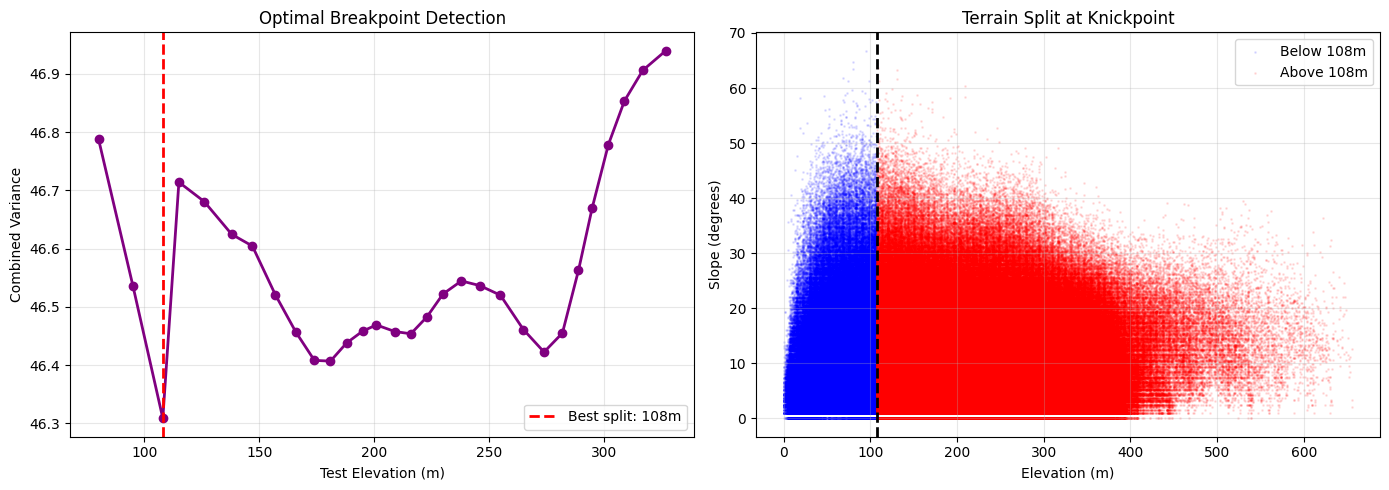


=== KNICKPOINT AT ~108m ===

BELOW knickpoint (108m):
  Mean slope: 10.37°
  Median slope: 8.57°
  Std dev: 7.90°

ABOVE knickpoint (108m):
  Mean slope: 8.12°
  Median slope: 6.35°
  Std dev: 6.59°

Difference in mean slope: 2.25°


In [29]:
# Statistical anaylsis 
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds

# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Open DEM
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Filter valid values
valid_mask = (~np.isnan(slope_degrees) & ~np.isnan(elevation) & 
              (elevation > 0) & (elevation < 10000))
if nodata is not None:
    valid_mask = valid_mask & (elevation != nodata)

slope_valid = slope_degrees[valid_mask]
elevation_valid = elevation[valid_mask]

# Split data into elevation bins and test different breakpoints
test_elevations = np.percentile(elevation_valid, np.linspace(10, 90, 30))
variances = []

for test_elev in test_elevations:
    # Split into above and below
    below = slope_valid[elevation_valid < test_elev]
    above = slope_valid[elevation_valid >= test_elev]
    
    if len(below) > 100 and len(above) > 100:
        # Calculate combined variance (lower = better split)
        total_var = (np.var(below) * len(below) + np.var(above) * len(above)) / len(slope_valid)
        variances.append(total_var)
    else:
        variances.append(np.nan)

# Find elevation with minimum variance (best natural split)
best_idx = np.nanargmin(variances)
knickpoint_elev = test_elevations[best_idx]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variance by breakpoint elevation
ax1.plot(test_elevations, variances, linewidth=2, color='purple', marker='o')
ax1.axvline(knickpoint_elev, color='red', linestyle='--', linewidth=2, 
            label=f'Best split: {knickpoint_elev:.0f}m')
ax1.set_xlabel('Test Elevation (m)')
ax1.set_ylabel('Combined Variance')
ax1.set_title('Optimal Breakpoint Detection')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Show the split
ax2.scatter(elevation_valid[elevation_valid < knickpoint_elev], 
            slope_valid[elevation_valid < knickpoint_elev],
            alpha=0.1, s=1, c='blue', label=f'Below {knickpoint_elev:.0f}m')
ax2.scatter(elevation_valid[elevation_valid >= knickpoint_elev], 
            slope_valid[elevation_valid >= knickpoint_elev],
            alpha=0.1, s=1, c='red', label=f'Above {knickpoint_elev:.0f}m')
ax2.axvline(knickpoint_elev, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Elevation (m)')
ax2.set_ylabel('Slope (degrees)')
ax2.set_title('Terrain Split at Knickpoint')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics above and below
below_slopes = slope_valid[elevation_valid < knickpoint_elev]
above_slopes = slope_valid[elevation_valid >= knickpoint_elev]

print(f"\n=== KNICKPOINT AT ~{knickpoint_elev:.0f}m ===")
print(f"\nBELOW knickpoint ({knickpoint_elev:.0f}m):")
print(f"  Mean slope: {np.mean(below_slopes):.2f}°")
print(f"  Median slope: {np.median(below_slopes):.2f}°")
print(f"  Std dev: {np.std(below_slopes):.2f}°")

print(f"\nABOVE knickpoint ({knickpoint_elev:.0f}m):")
print(f"  Mean slope: {np.mean(above_slopes):.2f}°")
print(f"  Median slope: {np.median(above_slopes):.2f}°")
print(f"  Std dev: {np.std(above_slopes):.2f}°")

print(f"\nDifference in mean slope: {abs(np.mean(below_slopes) - np.mean(above_slopes)):.2f}°")

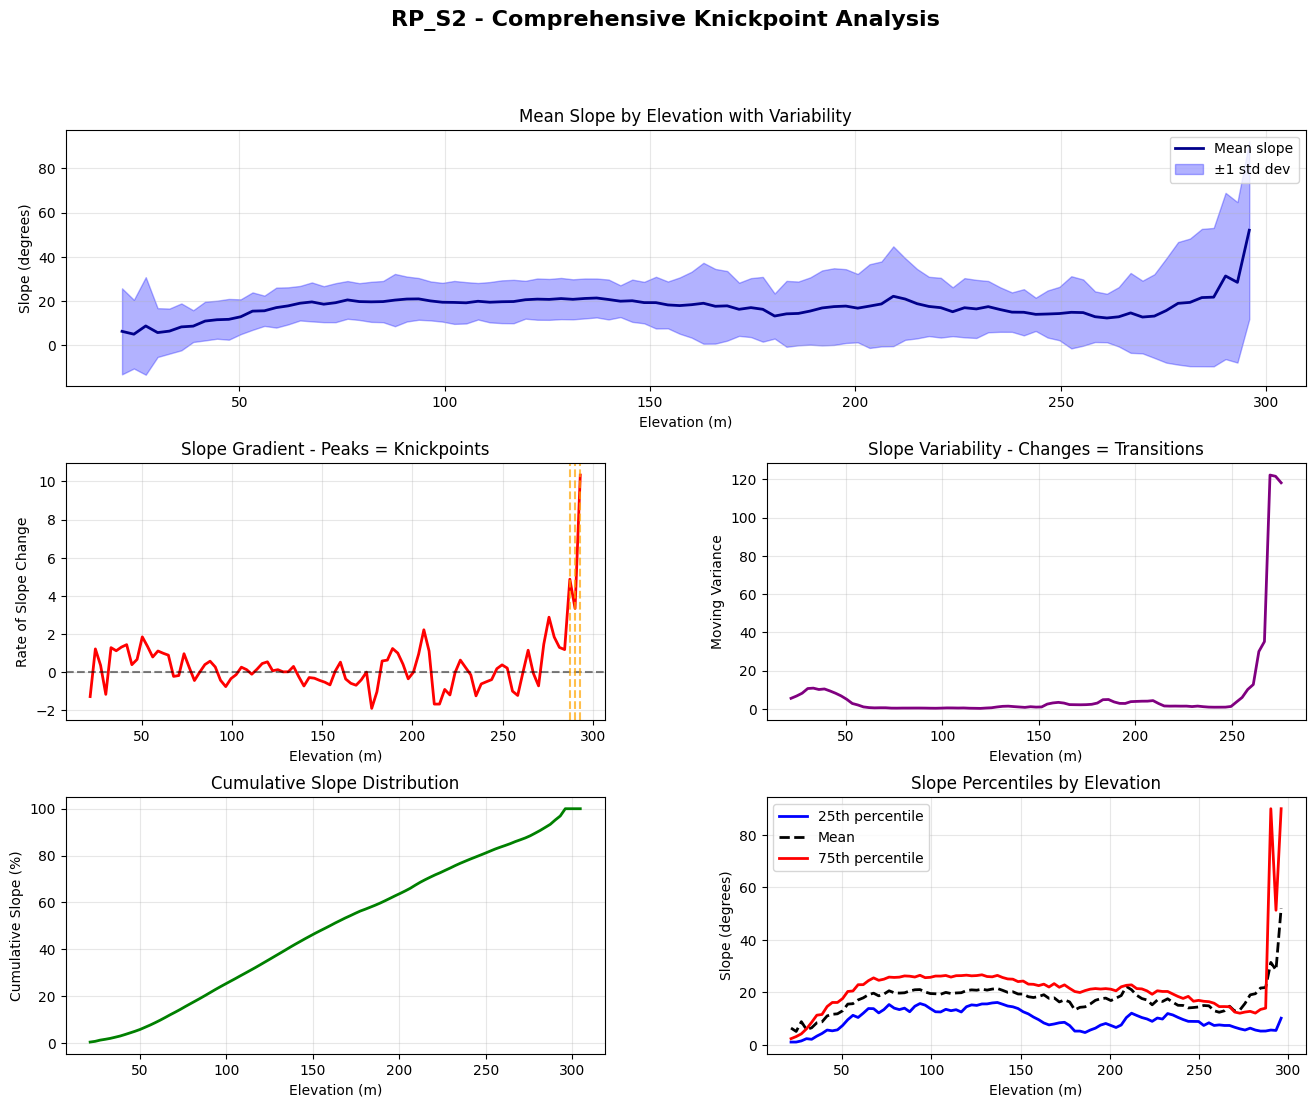


=== RP_S2 KNICKPOINT CANDIDATES ===
1. Elevation: 293m | Change: 10.334°/m | Direction: flat→steep
2. Elevation: 287m | Change: 4.875°/m | Direction: flat→steep
3. Elevation: 290m | Change: 3.339°/m | Direction: flat→steep
4. Elevation: 276m | Change: 2.882°/m | Direction: flat→steep
5. Elevation: 206m | Change: 2.221°/m | Direction: flat→steep

Elevation range: 20m to 306m
Mean slope: 17.29°
Median slope: 15.56°


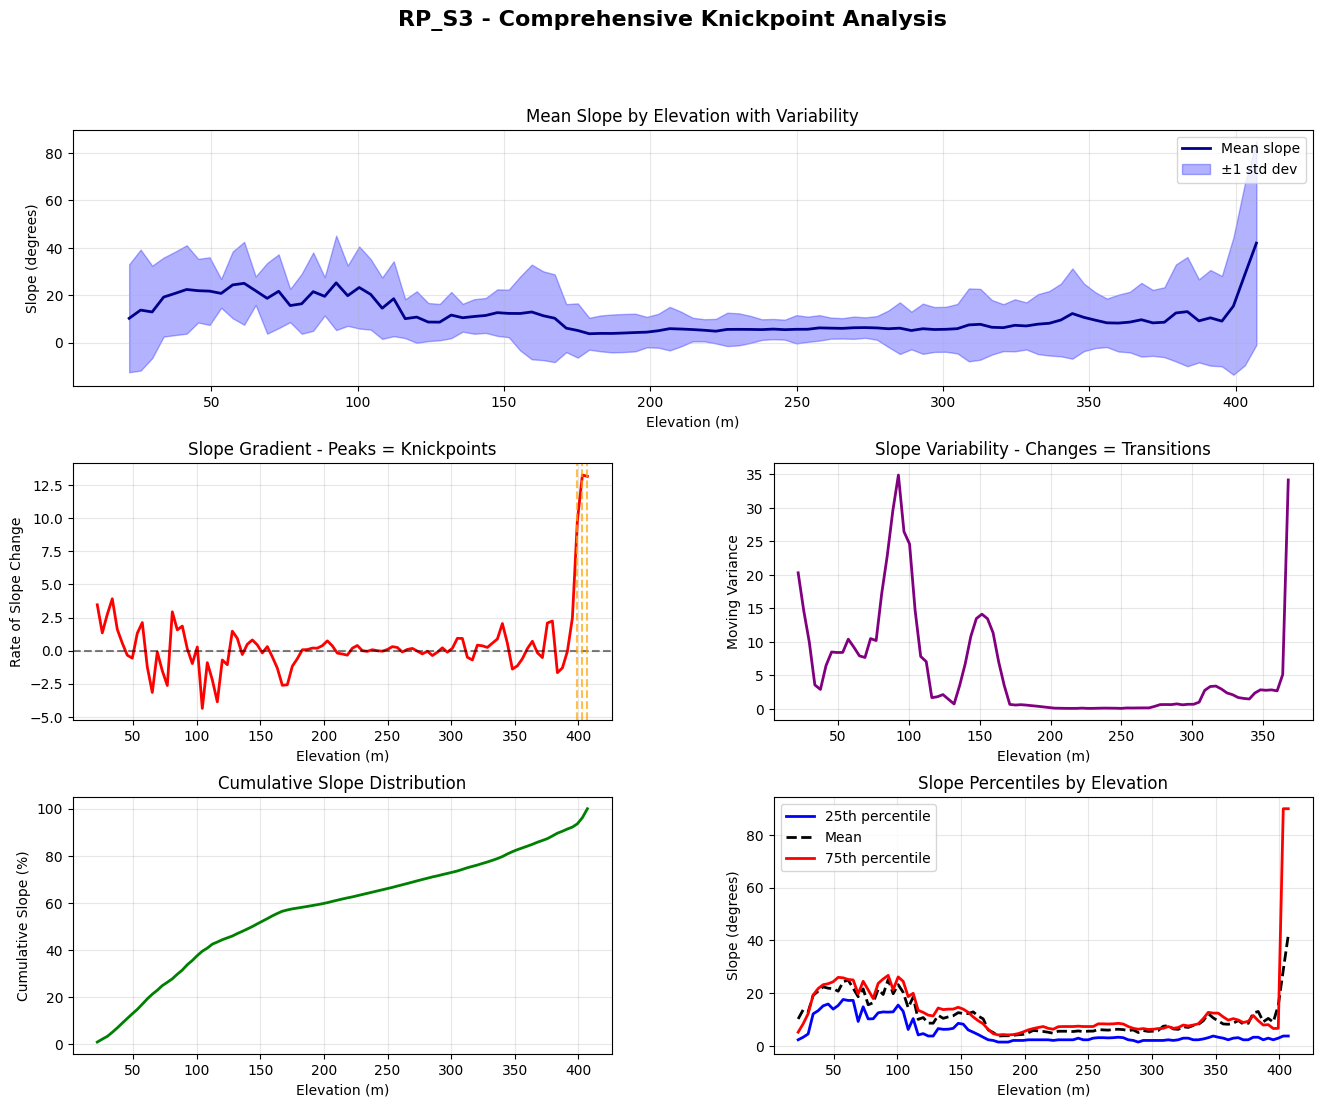


=== RP_S3 KNICKPOINT CANDIDATES ===
1. Elevation: 403m | Change: 13.276°/m | Direction: flat→steep
2. Elevation: 407m | Change: 13.181°/m | Direction: flat→steep
3. Elevation: 399m | Change: 9.860°/m | Direction: flat→steep
4. Elevation: 104m | Change: -4.369°/m | Direction: steep→flat
5. Elevation: 34m | Change: 3.919°/m | Direction: flat→steep

Elevation range: 20m to 409m
Mean slope: 6.43°
Median slope: 4.31°


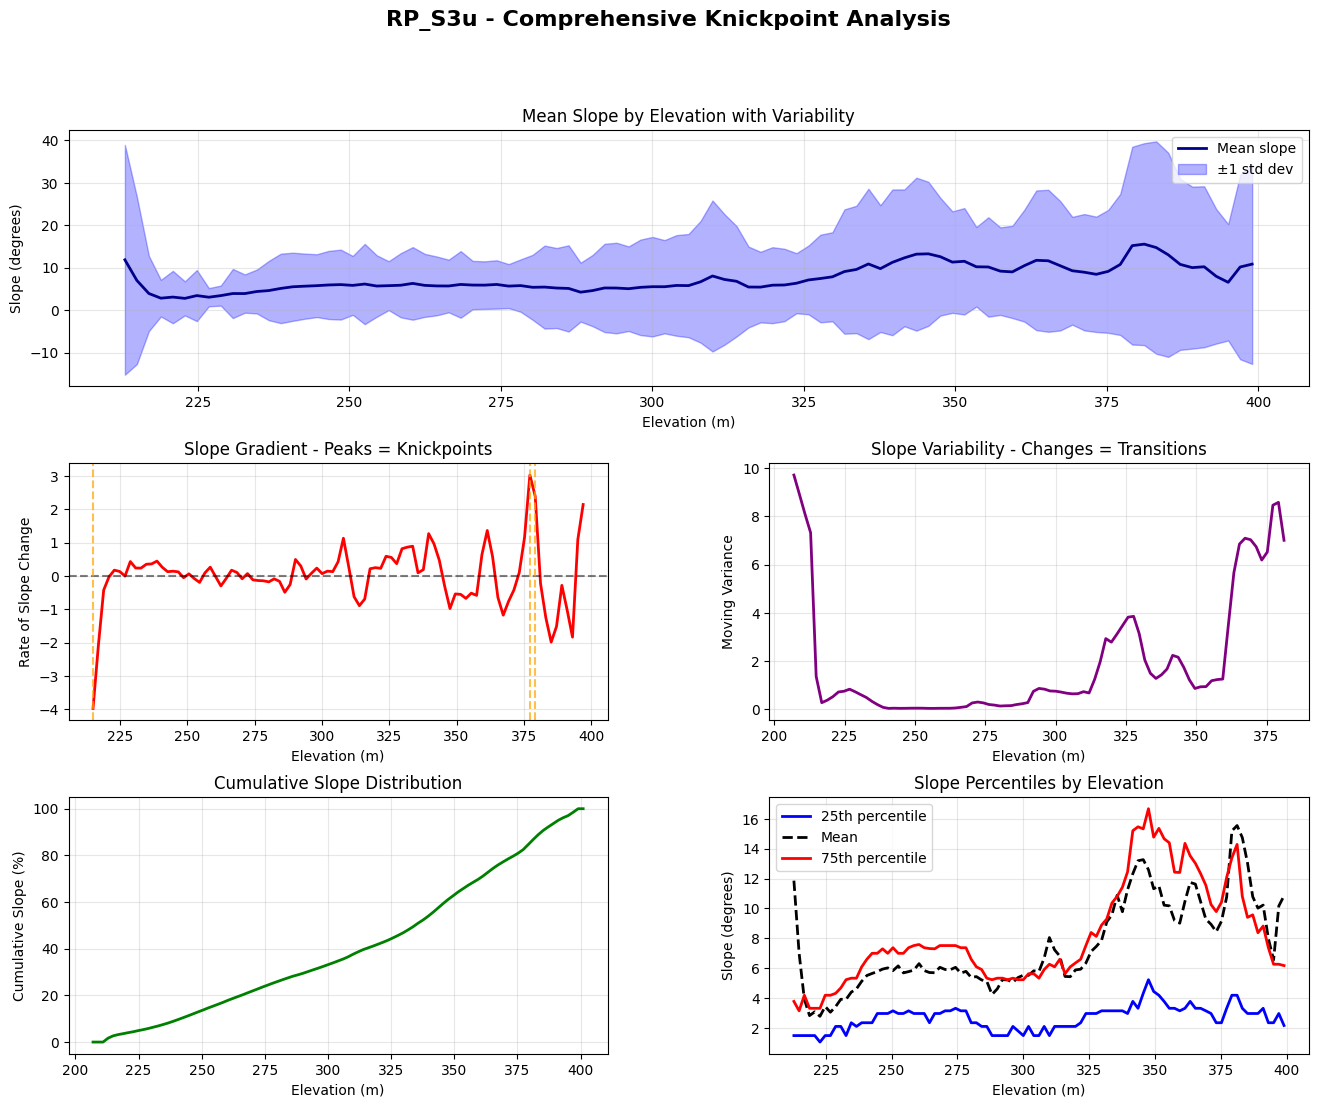


=== RP_S3u KNICKPOINT CANDIDATES ===
1. Elevation: 215m | Change: -3.970°/m | Direction: steep→flat
2. Elevation: 377m | Change: 3.028°/m | Direction: flat→steep
3. Elevation: 379m | Change: 2.393°/m | Direction: flat→steep
4. Elevation: 397m | Change: 2.145°/m | Direction: flat→steep
5. Elevation: 217m | Change: -2.086°/m | Direction: steep→flat

Elevation range: 206m to 402m
Mean slope: 6.53°
Median slope: 4.18°


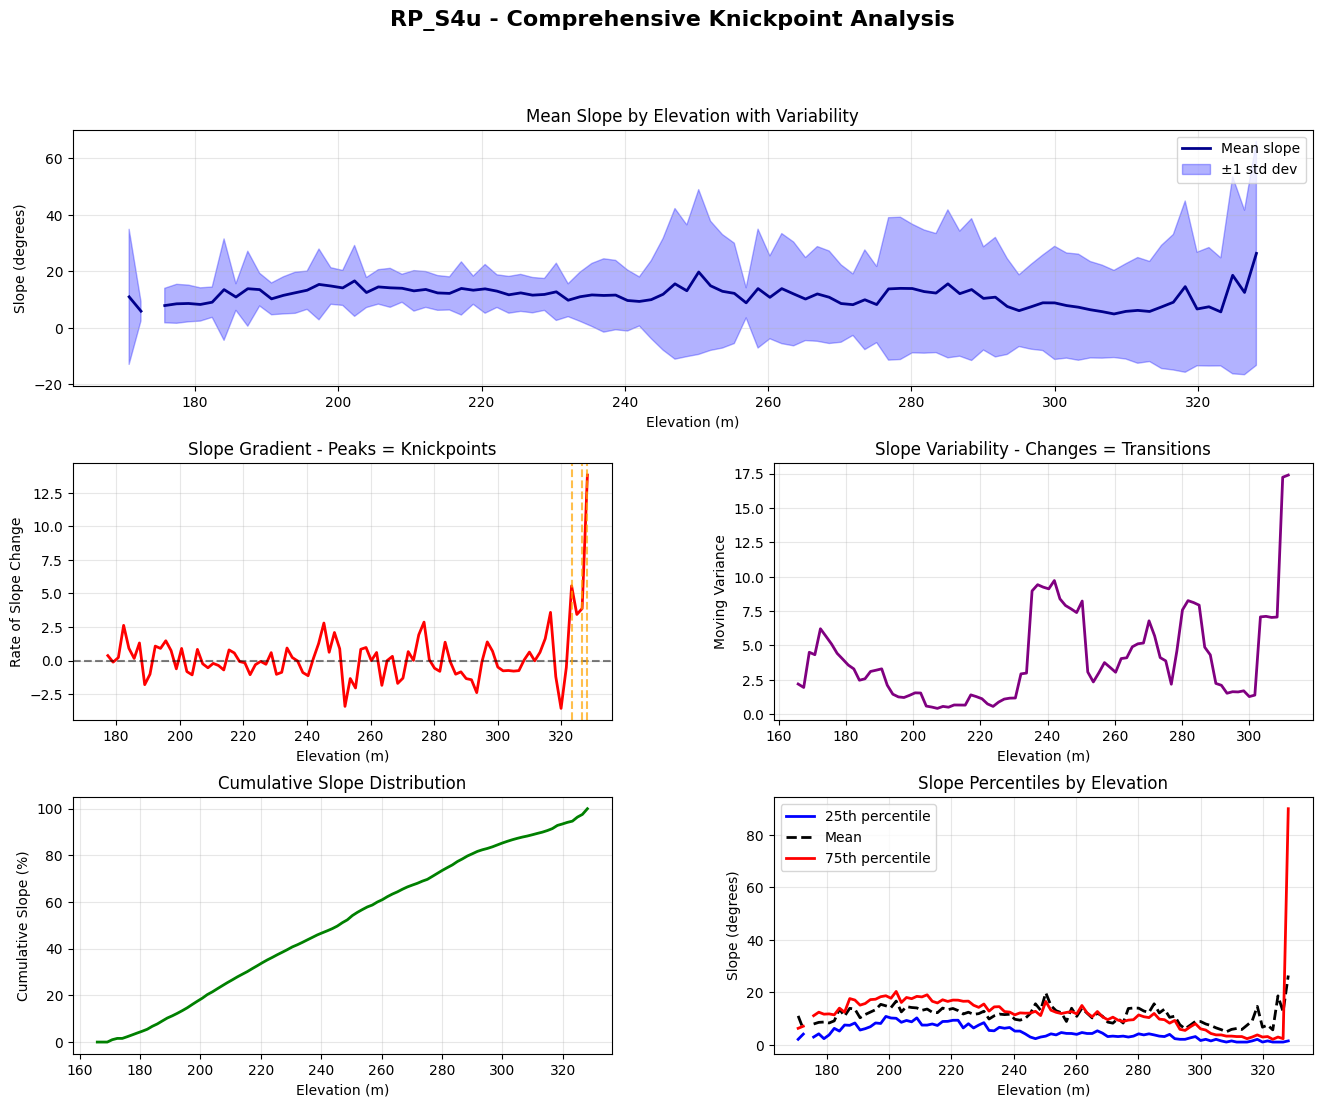


=== RP_S4u KNICKPOINT CANDIDATES ===
1. Elevation: 328m | Change: 13.825°/m | Direction: flat→steep
2. Elevation: 323m | Change: 5.569°/m | Direction: flat→steep
3. Elevation: 327m | Change: 3.877°/m | Direction: flat→steep
4. Elevation: 317m | Change: 3.593°/m | Direction: flat→steep
5. Elevation: 320m | Change: -3.563°/m | Direction: steep→flat

Elevation range: 165m to 329m
Mean slope: 11.01°
Median slope: 5.62°


In [30]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask

def knickpoint_analysis(shapefile_path, dem_path, title):
    """Comprehensive knickpoint analysis for a specific area"""
    
    # Read shapefile and clip DEM
    shapefile = gpd.read_file(shapefile_path)
    with rasterio.open(dem_path) as dem:
        elevation, transform = mask(dem, shapefile.geometry, crop=True)
        elevation = elevation[0]
        nodata = dem.nodata
    
    # Calculate slope
    cell_size = transform[0]
    dy, dx = np.gradient(elevation, cell_size)
    slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))
    
    # Filter valid values
    valid_mask = (~np.isnan(slope_degrees) & 
                  ~np.isnan(elevation) & 
                  (elevation > 0) & 
                  (elevation < 10000))
    if nodata is not None:
        valid_mask = valid_mask & (elevation != nodata)
    
    slope_valid = slope_degrees[valid_mask]
    elevation_valid = elevation[valid_mask]
    
    # Statistical analysis by elevation
    elevation_bins = np.linspace(elevation_valid.min(), elevation_valid.max(), 100)
    bin_centers = (elevation_bins[:-1] + elevation_bins[1:]) / 2
    mean_slopes = []
    std_slopes = []
    p25_slopes = []
    p75_slopes = []
    
    for i in range(len(elevation_bins) - 1):
        mask_bin = (elevation_valid >= elevation_bins[i]) & (elevation_valid < elevation_bins[i+1])
        if np.sum(mask_bin) > 10:
            mean_slopes.append(np.mean(slope_valid[mask_bin]))
            std_slopes.append(np.std(slope_valid[mask_bin]))
            p25_slopes.append(np.percentile(slope_valid[mask_bin], 25))
            p75_slopes.append(np.percentile(slope_valid[mask_bin], 75))
        else:
            mean_slopes.append(np.nan)
            std_slopes.append(np.nan)
            p25_slopes.append(np.nan)
            p75_slopes.append(np.nan)
    
    mean_slopes = np.array(mean_slopes)
    std_slopes = np.array(std_slopes)
    
    # Calculate rate of change
    slope_change = np.gradient(mean_slopes)
    
    # Moving window variance
    window_size = 10
    moving_variance = []
    for i in range(len(mean_slopes) - window_size):
        moving_variance.append(np.nanvar(mean_slopes[i:i+window_size]))
    
    # Create plots
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Plot 1: Mean slope with confidence bands
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(bin_centers, mean_slopes, linewidth=2, color='darkblue', label='Mean slope')
    ax1.fill_between(bin_centers, 
                      mean_slopes - std_slopes, 
                      mean_slopes + std_slopes, 
                      alpha=0.3, color='blue', label='±1 std dev')
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Slope (degrees)')
    ax1.set_title('Mean Slope by Elevation with Variability')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Rate of change
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(bin_centers, slope_change, linewidth=2, color='red')
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Elevation (m)')
    ax2.set_ylabel('Rate of Slope Change')
    ax2.set_title('Slope Gradient - Peaks = Knickpoints')
    ax2.grid(True, alpha=0.3)
    
    # Mark top 3 candidates
    valid_indices = ~np.isnan(slope_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(slope_change[valid_indices])
        top_3_indices = np.argsort(abs_changes)[-3:]
        valid_bin_centers = bin_centers[valid_indices]
        for idx in top_3_indices:
            ax2.axvline(valid_bin_centers[idx], color='orange', linestyle='--', alpha=0.7)
    
    # Plot 3: Moving variance
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(bin_centers[:len(moving_variance)], moving_variance, linewidth=2, color='purple')
    ax3.set_xlabel('Elevation (m)')
    ax3.set_ylabel('Moving Variance')
    ax3.set_title('Slope Variability - Changes = Transitions')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Cumulative distribution
    ax4 = fig.add_subplot(gs[2, 0])
    cumsum_slopes = np.nancumsum(mean_slopes)
    cumsum_slopes = cumsum_slopes / cumsum_slopes[-1] * 100
    ax4.plot(bin_centers, cumsum_slopes, linewidth=2, color='green')
    ax4.set_xlabel('Elevation (m)')
    ax4.set_ylabel('Cumulative Slope (%)')
    ax4.set_title('Cumulative Slope Distribution')
    ax4.grid(True, alpha=0.3)
    
    # Plot 5: Percentile analysis
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.plot(bin_centers, p25_slopes, linewidth=2, color='blue', label='25th percentile')
    ax5.plot(bin_centers, mean_slopes, linewidth=2, color='black', label='Mean', linestyle='--')
    ax5.plot(bin_centers, p75_slopes, linewidth=2, color='red', label='75th percentile')
    ax5.set_xlabel('Elevation (m)')
    ax5.set_ylabel('Slope (degrees)')
    ax5.set_title('Slope Percentiles by Elevation')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    plt.suptitle(f'{title} - Comprehensive Knickpoint Analysis', fontsize=16, fontweight='bold')
    plt.show()
    
    # Print statistics
    print(f"\n{'='*50}")
    print(f"=== {title} KNICKPOINT CANDIDATES ===")
    print(f"{'='*50}")
    
    valid_indices = ~np.isnan(slope_change)
    if np.sum(valid_indices) > 0:
        abs_changes = np.abs(slope_change[valid_indices])
        top_5_indices = np.argsort(abs_changes)[-5:][::-1]
        valid_bin_centers = bin_centers[valid_indices]
        valid_slope_change = slope_change[valid_indices]
        
        for i, idx in enumerate(top_5_indices, 1):
            elev = valid_bin_centers[idx]
            change = valid_slope_change[idx]
            direction = "steep→flat" if change < 0 else "flat→steep"
            print(f"{i}. Elevation: {elev:.0f}m | Change: {change:.3f}°/m | Direction: {direction}")
    
    print(f"\nElevation range: {elevation_valid.min():.0f}m to {elevation_valid.max():.0f}m")
    print(f"Mean slope: {np.mean(slope_valid):.2f}°")
    print(f"Median slope: {np.median(slope_valid):.2f}°")


# DEM path
dem_path = '/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif'

# Run analysis for all 4 shapefiles
knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp', 
                    dem_path, 'RP_S2')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp', 
                    dem_path, 'RP_S3')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp', 
                    dem_path, 'RP_S3u')

knickpoint_analysis('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp', 
                    dem_path, 'RP_S4u')

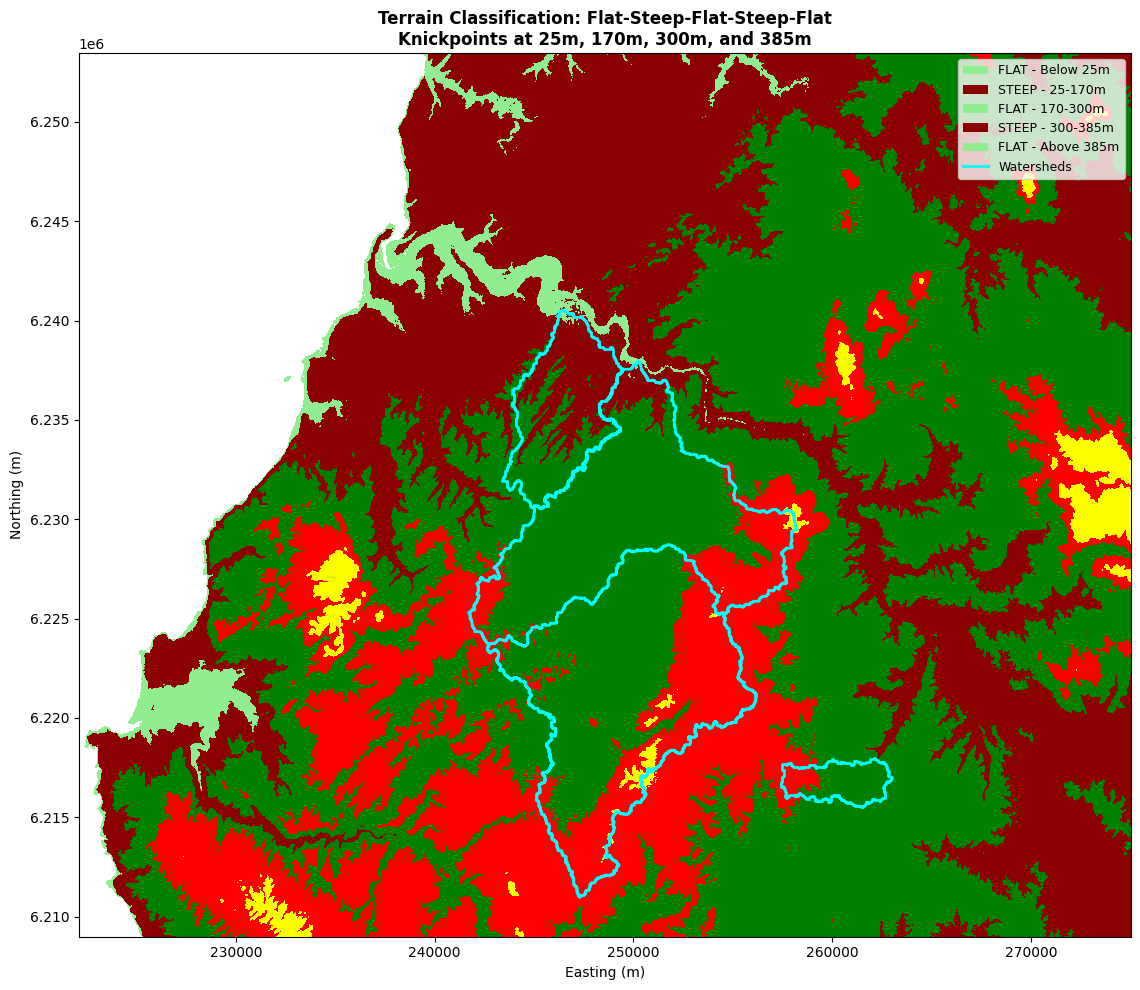


=== TERRAIN CLASSIFICATION STATISTICS ===
Knickpoint elevations: 25m, 170m, 300m, and 385m

FLAT - Low elevation (<25m):
  Pixels: 70,547 (2.7%)
  Area: ~52.77 km²

STEEP - Canyon zone (25-170m):
  Pixels: 805,637 (30.6%)
  Area: ~602.66 km²

FLAT - Mid elevation (170-300m):
  Pixels: 1,251,885 (47.5%)
  Area: ~936.48 km²

STEEP - High elevation (300-385m):
  Pixels: 466,506 (17.7%)
  Area: ~348.97 km²

FLAT - Top elevation (>385m):
  Pixels: 39,940 (1.5%)
  Area: ~29.88 km²

=== SUMMARY ===
Total FLAT areas: 1,362,372 pixels (51.7%) = ~1019.13 km²
Total STEEP areas: 1,272,143 pixels (48.3%) = ~951.63 km²


In [48]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from rasterio.windows import from_bounds
import geopandas as gpd

# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Knickpoint elevations - now with 4 knickpoints creating 5 zones
knickpoint_low = 25      # meters
knickpoint_mid = 170     # meters
knickpoint_high = 300    # meters
knickpoint_top = 385     # meters - NEW!

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata
    
    # Get the bounds of the cropped window for plotting
    window_bounds = rasterio.windows.bounds(window, dem.transform)

# Read shapefiles
shp1 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp')
shp2 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp')
shp3 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp')
shp4 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp')

# Calculate slope
cell_size = transform[0]
dy, dx = np.gradient(elevation, cell_size)
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))

# Create classification with 5 zones alternating FLAT-STEEP-FLAT-STEEP-FLAT
terrain_class = np.zeros_like(elevation)
terrain_class[(elevation > 0) & (elevation < knickpoint_low)] = 1      # FLAT - Low
terrain_class[(elevation >= knickpoint_low) & (elevation < knickpoint_mid)] = 2  # STEEP - Canyon
terrain_class[(elevation >= knickpoint_mid) & (elevation < knickpoint_high)] = 3  # FLAT - Mid
terrain_class[(elevation >= knickpoint_high) & (elevation < knickpoint_top)] = 4  # STEEP - High
terrain_class[(elevation >= knickpoint_top) & (elevation < 10000)] = 5  # FLAT - Top

# Mask out nodata
if nodata is not None:
    terrain_class[elevation == nodata] = 0
terrain_class[np.isnan(elevation)] = 0
terrain_class[elevation <= 0] = 0

# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Colors alternating: white (nodata), green (flat), red (steep), green (flat), red (steep), green (flat)
colors = ['white', 'lightgreen', 'darkred', 'green', 'red', 'yellow']
cmap = ListedColormap(colors)
im = ax.imshow(terrain_class, cmap=cmap, vmin=0, vmax=5, 
               extent=[window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]])

# Plot shapefile outlines
shp1.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp2.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp3.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp4.boundary.plot(ax=ax, color='cyan', linewidth=2)

ax.set_title(f'Terrain Classification: Flat-Steep-Flat-Steep-Flat\nKnickpoints at {knickpoint_low}m, {knickpoint_mid}m, {knickpoint_high}m, and {knickpoint_top}m', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor='lightgreen', label=f'FLAT - Below {knickpoint_low}m'),
    Patch(facecolor='darkred', label=f'STEEP - {knickpoint_low}-{knickpoint_mid}m'),
    Patch(facecolor='lightgreen', label=f'FLAT - {knickpoint_mid}-{knickpoint_high}m'),
    Patch(facecolor='darkred', label=f'STEEP - {knickpoint_high}-{knickpoint_top}m'),
    Patch(facecolor='lightgreen', label=f'FLAT - Above {knickpoint_top}m'),
    Line2D([0], [0], color='cyan', linewidth=2, label='Watersheds')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

# Print statistics
flat_low = np.sum(terrain_class == 1)
steep_canyon = np.sum(terrain_class == 2)
flat_mid = np.sum(terrain_class == 3)
steep_high = np.sum(terrain_class == 4)
flat_top = np.sum(terrain_class == 5)
total_valid = flat_low + steep_canyon + flat_mid + steep_high + flat_top

print(f"\n=== TERRAIN CLASSIFICATION STATISTICS ===")
print(f"Knickpoint elevations: {knickpoint_low}m, {knickpoint_mid}m, {knickpoint_high}m, and {knickpoint_top}m")
print(f"\nFLAT - Low elevation (<{knickpoint_low}m):")
print(f"  Pixels: {flat_low:,} ({flat_low/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_low * cell_size**2 / 1e6:.2f} km²")

print(f"\nSTEEP - Canyon zone ({knickpoint_low}-{knickpoint_mid}m):")
print(f"  Pixels: {steep_canyon:,} ({steep_canyon/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_canyon * cell_size**2 / 1e6:.2f} km²")

print(f"\nFLAT - Mid elevation ({knickpoint_mid}-{knickpoint_high}m):")
print(f"  Pixels: {flat_mid:,} ({flat_mid/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_mid * cell_size**2 / 1e6:.2f} km²")

print(f"\nSTEEP - High elevation ({knickpoint_high}-{knickpoint_top}m):")
print(f"  Pixels: {steep_high:,} ({steep_high/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_high * cell_size**2 / 1e6:.2f} km²")

print(f"\nFLAT - Top elevation (>{knickpoint_top}m):")
print(f"  Pixels: {flat_top:,} ({flat_top/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_top * cell_size**2 / 1e6:.2f} km²")

# Summary by terrain type
total_flat = flat_low + flat_mid + flat_top
total_steep = steep_canyon + steep_high
print(f"\n=== SUMMARY ===")
print(f"Total FLAT areas: {total_flat:,} pixels ({total_flat/total_valid*100:.1f}%) = ~{total_flat * cell_size**2 / 1e6:.2f} km²")
print(f"Total STEEP areas: {total_steep:,} pixels ({total_steep/total_valid*100:.1f}%) = ~{total_steep * cell_size**2 / 1e6:.2f} km²")

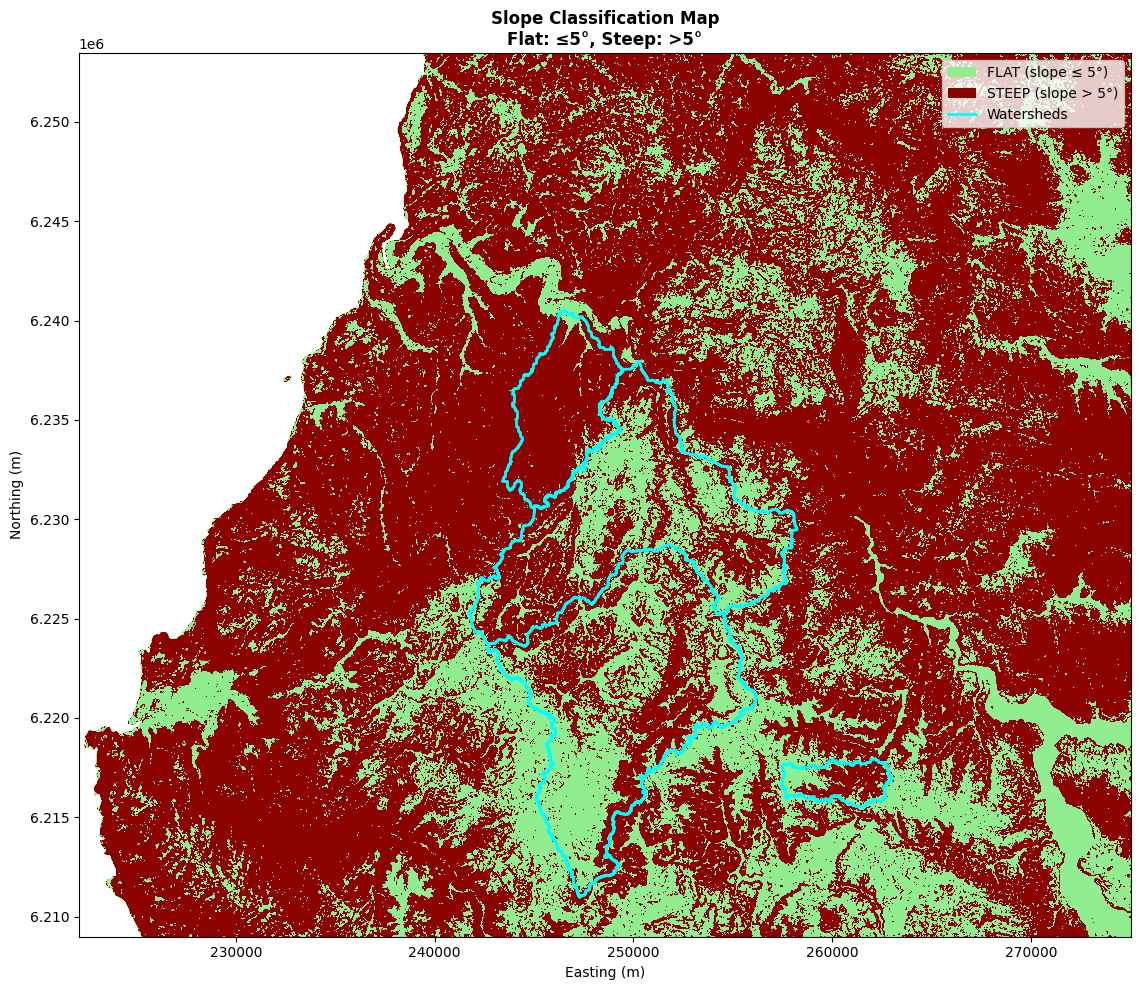


=== SLOPE CLASSIFICATION STATISTICS ===
Slope threshold: 5°

FLAT areas (slope ≤ 5°):
  Pixels: 1,012,529 (38.4%)
  Area: ~757.43 km²
  Mean slope: 2.64°

STEEP areas (slope > 5°):
  Pixels: 1,621,986 (61.6%)
  Area: ~1213.33 km²
  Mean slope: 12.09°

Overall slope statistics:
  Mean: 8.46°
  Max: 66.78°
  Min: 0.00°


In [44]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from rasterio.windows import from_bounds
import geopandas as gpd

# Your area coordinates
min_x, min_y = 222103, 6208992
max_x, max_y = 275034, 6253454

# Slope threshold in degrees - adjust this to your preference
slope_threshold = 5  # degrees (slopes > 5° are "steep", <= 5° are "flat")

# Open DEM and extract subset
with rasterio.open('/Users/Glong1/Desktop/Andes/Andes_watersheds/RapelRiver/rapel_SRTMGL130m_dem_utm.tif') as dem:
    window = from_bounds(min_x, min_y, max_x, max_y, dem.transform)
    elevation = dem.read(1, window=window)
    transform = dem.window_transform(window)
    nodata = dem.nodata
    
    # Get the bounds of the cropped window for plotting
    window_bounds = rasterio.windows.bounds(window, dem.transform)

# Read shapefiles
shp1 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S2_mask/RP_S2_mask.shp')
shp2 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3_mask/RP_S3_mask.shp')
shp3 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S3u_mask/RP_S3u_mask.shp')
shp4 = gpd.read_file('/Users/Glong1/Desktop/Andes/AndesTG/Rapel/output_polygons/RP_S4u_mask/RP_S4u_mask.shp')

# Calculate slope using gradient
cell_size = transform[0]  # Get pixel size in meters
dy, dx = np.gradient(elevation, cell_size)  # Calculate elevation change
slope_degrees = np.degrees(np.arctan(np.sqrt(dx**2 + dy**2)))  # Convert to degrees

# Create slope classification: 0=nodata, 1=flat, 2=steep
slope_class = np.zeros_like(elevation)
slope_class[(elevation > 0) & (slope_degrees <= slope_threshold)] = 1  # FLAT
slope_class[(elevation > 0) & (slope_degrees > slope_threshold)] = 2   # STEEP

# Mask out nodata
if nodata is not None:
    slope_class[elevation == nodata] = 0
slope_class[np.isnan(elevation)] = 0
slope_class[elevation <= 0] = 0

# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors: white for nodata, green for flat, red for steep
colors = ['white', 'lightgreen', 'darkred']
cmap = ListedColormap(colors)
im = ax.imshow(slope_class, cmap=cmap, vmin=0, vmax=2, 
               extent=[window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]])

# Plot shapefile outlines
shp1.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp2.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp3.boundary.plot(ax=ax, color='cyan', linewidth=2)
shp4.boundary.plot(ax=ax, color='cyan', linewidth=2)

ax.set_title(f'Slope Classification Map\nFlat: ≤{slope_threshold}°, Steep: >{slope_threshold}°', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor='lightgreen', label=f'FLAT (slope ≤ {slope_threshold}°)'),
    Patch(facecolor='darkred', label=f'STEEP (slope > {slope_threshold}°)'),
    Line2D([0], [0], color='cyan', linewidth=2, label='Watersheds')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Print statistics
flat_pixels = np.sum(slope_class == 1)
steep_pixels = np.sum(slope_class == 2)
total_valid = flat_pixels + steep_pixels

print(f"\n=== SLOPE CLASSIFICATION STATISTICS ===")
print(f"Slope threshold: {slope_threshold}°")
print(f"\nFLAT areas (slope ≤ {slope_threshold}°):")
print(f"  Pixels: {flat_pixels:,} ({flat_pixels/total_valid*100:.1f}%)")
print(f"  Area: ~{flat_pixels * cell_size**2 / 1e6:.2f} km²")
print(f"  Mean slope: {slope_degrees[slope_class == 1].mean():.2f}°")

print(f"\nSTEEP areas (slope > {slope_threshold}°):")
print(f"  Pixels: {steep_pixels:,} ({steep_pixels/total_valid*100:.1f}%)")
print(f"  Area: ~{steep_pixels * cell_size**2 / 1e6:.2f} km²")
print(f"  Mean slope: {slope_degrees[slope_class == 2].mean():.2f}°")

print(f"\nOverall slope statistics:")
print(f"  Mean: {slope_degrees[slope_class > 0].mean():.2f}°")
print(f"  Max: {slope_degrees[slope_class > 0].max():.2f}°")
print(f"  Min: {slope_degrees[slope_class > 0].min():.2f}°")

# I think the best way to represent this surface is to pair the slope map and elevation plot ro show the surface at >170 that is the flat surface compared to the step surfaces in the terrain. 